# Sample Experiment

In [103]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Packages

In [104]:
import numpy as np
import pandas as pd
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import stumpy

import eye_state_prototype
from eye_state_prototype import motif_extraction, learn_prototype, combined_gaussian
from eye_state_prototype import fpm, find_peaks_in_ear_ts, cal_bpm_results
from eye_state_prototype import plot_ear, plot_results

In [105]:
mpl.rcParams['text.usetex'] = True

## Load Data

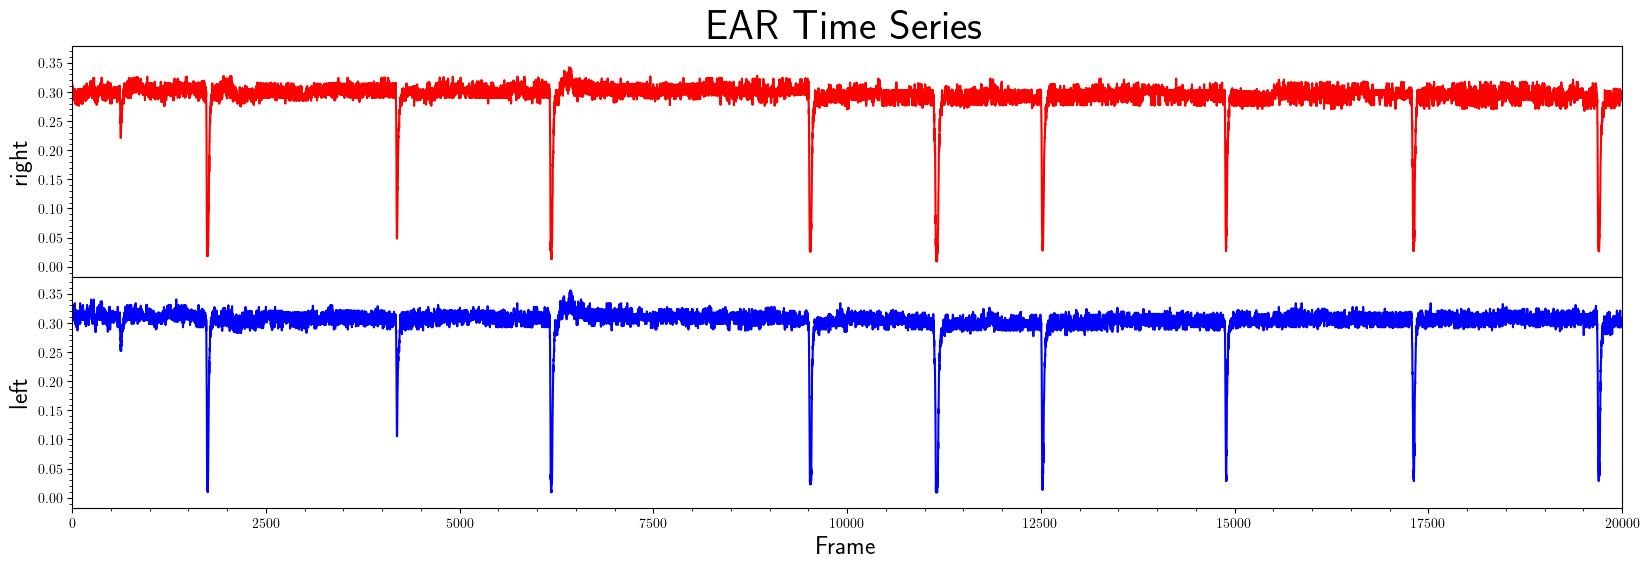

True

In [106]:
# load data
filepath = "data/Proband 06_2023-08-02_15-15-05.csv"
proband_df = pd.read_csv(filepath)

ear_r = proband_df["EAR2D6_r"].values
ear_l = proband_df["EAR2D6_l"].values
n = len(ear_r)

eye_state_prototype.plot_ear(ear_r, ear_l)

## Learned Prototype

### Prototype Extraction

In [107]:
# get motif distances and indices
motif_distances, motif_indices = motif_extraction(ear_r[0:20000], m=100, max_matches=10)

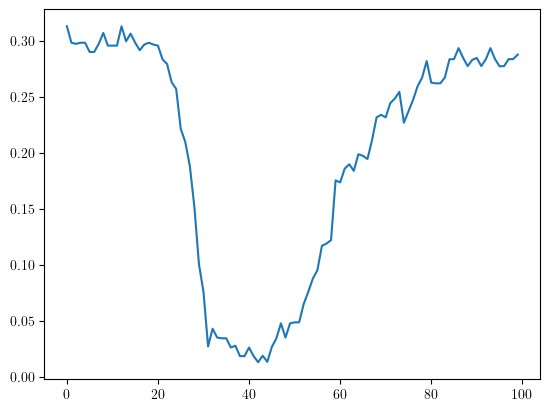

In [108]:
# get motif No.1
motif_01 = learn_prototype(ear_r[0:20000], m=100, max_matches=10)
plt.plot(motif_01)

### Blink Pattern Matching

In [109]:
# # load example data
# learned_prototype = np.loadtxt("./data/learned_prototype_example_th3.5_top9_no1.txt")
# plt.plot(learned_prototype)
# plt.xlabel("Frame")
# plt.ylabel("EAR")

In [110]:
results_learned = cal_bpm_results(ear_r, ear_l, prototype=learned_prototype)

Text(0, 0.5, 'EAR (left)')

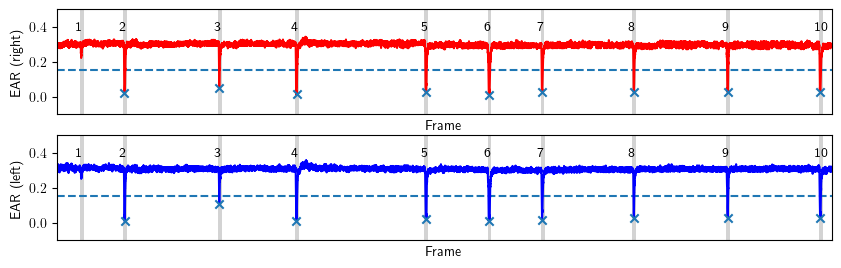

In [111]:
fig, axs = plt.subplots(2, 1, figsize=(10, 3), sharex=True, sharey=True)
plot_results(ax=axs[0], ears=(ear_r, ear_l), results=results_learned, side="right", xmin=0, xmax=20000)
plot_results(ax=axs[1], ears=(ear_r, ear_l), results=results_learned, side="left", xmin=0, xmax=20000)
axs[0].set_xlabel("Frame")
axs[0].set_ylabel("EAR (right)")
axs[1].set_ylabel("EAR (left)")

### Statistics
todo?

## Manual Prototype

### Manual Prototype Definition

In [112]:
# load parameters
gaussian_params_df = pd.read_csv("./data/gaussian_params_example.csv")
display(gaussian_params_df)

,sigma1,sigma2,avg_open,prominence,noise_std
0,6.333333,13.666667,0.302698,0.254082,0.006772


In [113]:
# set values
sig1 = gaussian_params_df["sigma1"].values
sig2 = gaussian_params_df["sigma2"].values
avg = gaussian_params_df["avg_open"].values
prom = gaussian_params_df["prominence"].values
std = gaussian_params_df["noise_std"].values

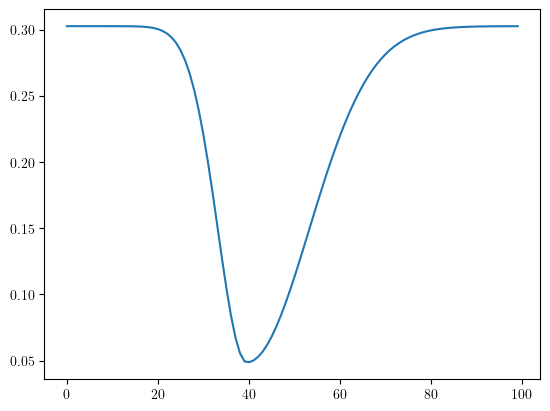

In [114]:
manual_prototype = combined_gaussian(sig1, sig2, avg, prom, m=100, noise=None)
plt.plot(manual_prototype)

### Blink Pattern Matching

In [115]:
# # load example data
# manual_prototype = np.loadtxt("./data/manual_prototype_example_fs_m100.txt")
# plt.plot(learned_prototype)
# plt.xlabel("Frame")
# plt.ylabel("EAR")

In [116]:
results_learned = cal_bpm_results(ear_r, ear_l, prototype=learned_prototype)

Text(0, 0.5, 'EAR (left)')

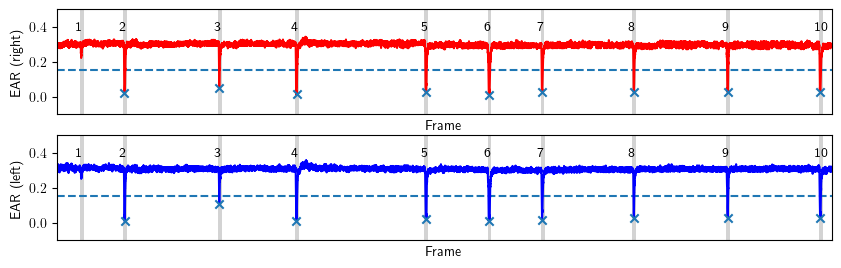

In [117]:
fig, axs = plt.subplots(2, 1, figsize=(10, 3), sharex=True, sharey=True)
plot_results(ax=axs[0], ears=(ear_r, ear_l), results=results_learned, side="right", xmin=0, xmax=20000)
plot_results(ax=axs[1], ears=(ear_r, ear_l), results=results_learned, side="left", xmin=0, xmax=20000)
axs[0].set_xlabel("Frame")
axs[0].set_ylabel("EAR (right)")
axs[1].set_ylabel("EAR (left)")

### Statistics
todo?